In [17]:
# Import necessary libraries
import os
import numpy as np
import pathlib
import matplotlib.pyplot as plt
from skimage.io import imread
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

In [18]:
# Define the path to the directory containing the image folders
data_dir = pathlib.Path('./images/').with_suffix('')

Categories = ['Broken soybeans', 'Immature soybeans', 'Intact soybeans', 'Skin-damaged soybeans', 'Spotted soybeans']
image_data = []  # List to store flattened image vectors
labels = []  # List to store category labels

for category in Categories:
    print(f'Loading category: {category}')
    path = os.path.join(data_dir, category)
    
    # Loop through each image in the category folder
    for img_filename in os.listdir(path):
        img_path = os.path.join(path, img_filename)
        
        # Read the image using scikit-image
        img = imread(img_path)
        
        # Flatten the image and add it to the data
        image_data.append(img.flatten())
        
        # Add the label (category) to the labels list
        labels.append(category)

image_data = np.array(image_data)
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)


Loading category: Broken soybeans
Loading category: Immature soybeans
Loading category: Intact soybeans
Loading category: Skin-damaged soybeans
Loading category: Spotted soybeans


In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(image_data, encoded_labels, test_size=0.2, random_state=42)

# Define a range of tree sizes to experiment with
tree_sizes = [10, 50, 100, 200, 300, 400, 500]
accuracy_scores = []

In [20]:
for n_trees in tree_sizes:
    # Create a Random Forest classifier with the current number of trees
    rf_classifier = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    
    # Train the Random Forest classifier on the training data
    rf_classifier.fit(X_train, y_train)
    
    # Evaluate the model on the testing data and compute accuracy
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    # Print the accuracy for the current number of trees
    print(f'Accuracy with {n_trees} trees: {accuracy}')

Accuracy with 10 trees: 0.6174070716228468
Accuracy with 50 trees: 0.670897552130553
Accuracy with 100 trees: 0.700815956482321
Accuracy with 200 trees: 0.7026291931097008
Accuracy with 300 trees: 0.7044424297370807
Accuracy with 400 trees: 0.7116953762466002
Accuracy with 500 trees: 0.7116953762466002


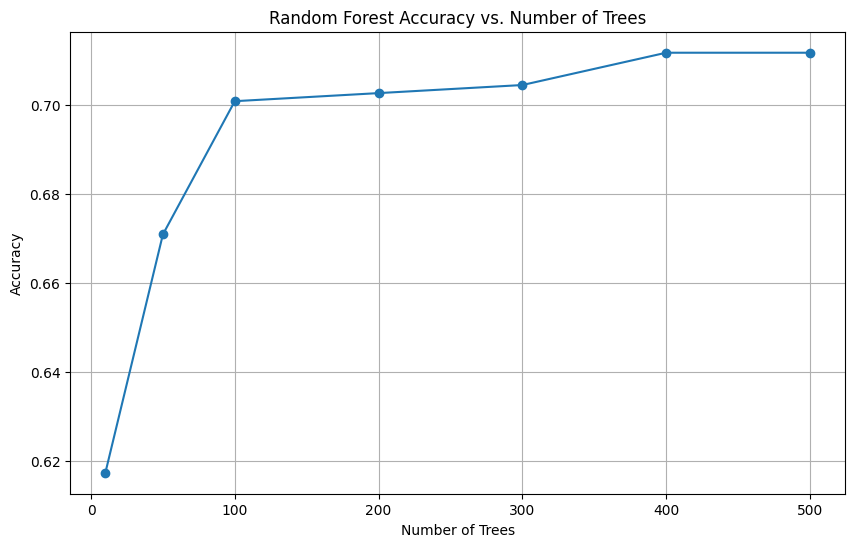

In [21]:
# Plot the accuracy scores for different tree sizes
plt.figure(figsize=(10, 6))
plt.plot(tree_sizes, accuracy_scores, marker='o')
plt.title('Random Forest Accuracy vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
